# HW 5 - PCA and SVD
As usual, you are permited to work in groups of up to 4. Please indicate who you worked with. 

This HW will be worth 2X what the other homeworks have been counted as. Due date will be Sunday at 11:59. Upload the saved file to gauchospace as *firstname_lastname-HW5.ipynb*

Good Luck!


#### Question 1: Exploring Gene Space
Imagine that we are doing a set of experiments on yeast cells to understand how they respond to environmental perturbations.

Consider the data matrix X below where each row corresponds to a gene (call them gene 1 and gene 2), and each column
corresponds to an assay (an experimental condition). Let’s say the first five columns are assays every 10 min following heat shock, and the second five columns are assays every 10 min following a shift from glucose to glycerol.

In [104]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10],[.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0]])

X

array([[ 0. ,  2. ,  4. ,  8. , 10. ,  0. ,  3. ,  6. ,  7.5, 10. ],
       [ 0.5,  1. ,  1.8,  2.4,  3. ,  5. ,  3.3,  2. ,  0.9,  0. ]])

#### Question 1.1
Plot the data points in gene 1 - gene 2 space.

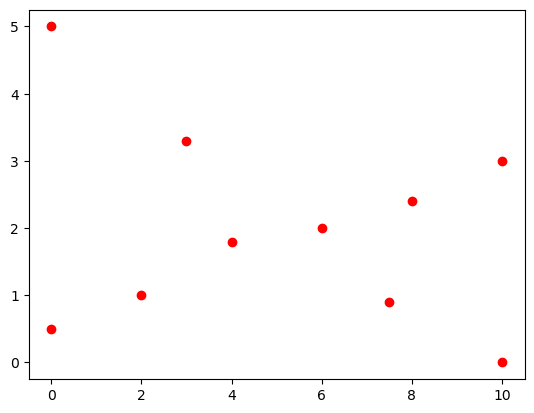

In [90]:
plt.plot(X[0,:], X[1,:], 'o', color = 'r')

#### Question 1.2
What is the mean expression value for each gene?

In [91]:
print(np.mean(X[0,:]))
print(np.mean(X[1,:]))

5.05
1.9899999999999998


#### Question 1.3
What is the variance of the expression value for each gene?

In [20]:
print(np.var(X[0,:]))
print(np.var(X[1,:]))

13.022499999999999
2.0349000000000004


#### Question 1.4
Plot the four time courses (2 genes X 2 conditions) as a function of time with the first measurments being time 0 all on the same plot. What can you say about the how the genes are correlated in their responses to these perturbations?

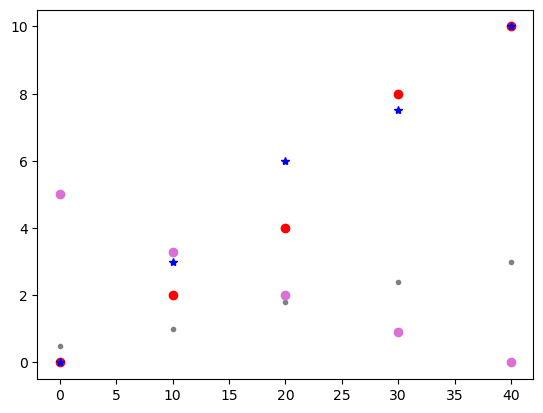

In [105]:
T = np.array([[0, 10, 20, 30, 40]])
              
plt.plot(T[0,:5], X[0,:5], 'o', color = 'r')
plt.plot(T[0,:5], X[0,5:10], '*', color = 'b')
plt.plot(T[0,:5], X[1,:5], '.', color = 'gray')
plt.plot(T[0,:5], X[1,5:10], 'o', color = 'orchid')

# it seems that for gene 1, changing the condition from glucose to glyercol does not result in any significant—
# —change in gene expression

# but for gene 2, changing the condition seems to result in gene expression values going—
# —progressively down once conditions switch from glucose to glyerol

#### Question 2: PCA on a data matrix
Perform a Principal Component Analysis of the data in the matrix X:
* Create a new matrix Y by subtracting off the mean expression value for each gene from matrix entries for that gene.
* Evaluate the 2 X 2 gene-covariance matrix C using the data in Y.
* Evaluate the eigenvalues of C.
* What fraction of the total variance of the data is accounted for by the first principal component of C? (The total variance of the data is the sum of the variances of gene 1 and gene 2 that you evaluated earlier.)
* Find the principal component eigenvectors and plot their directions on the same plot as the data points. Don’t forget to order your eigenvectors appropriately.

In [106]:
Y = X - np.mean(X, axis = 1).reshape(2,1)

C = np.cov(Y)

evals, evecs = np.linalg.eig(C)

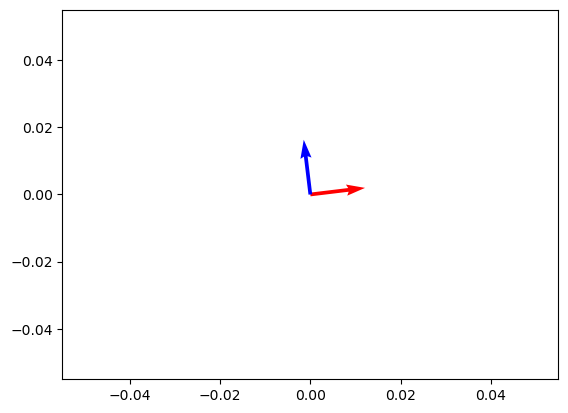

In [107]:
# HINT: use the quiver function to plot the vector directions

order = evals.argsort()[::-1]
evals = evals[order]
evecs = evecs[:, order]


origin = [0,0]
vec1 = evecs[:,0]
vec2 = evecs[:,1]
plt.quiver(origin, origin, vec1, vec2, color=['r','b'], scale=9)
plt.show()

In [108]:
# NOTE: Hint on the percentage of variance representation
print('Fraction of the Total Variance of PC1 is ', C[0][0]/(C[0][0]+C[1][1]))

Fraction of the Total Variance of PC1 is  0.8648571466521444


#### Question 2.1
* Re-express the gene-assay matrix X as a principal component-assay matrix by projecting each data point (column) onto the PCs.
* Plot the reprojected data

(2, 10)


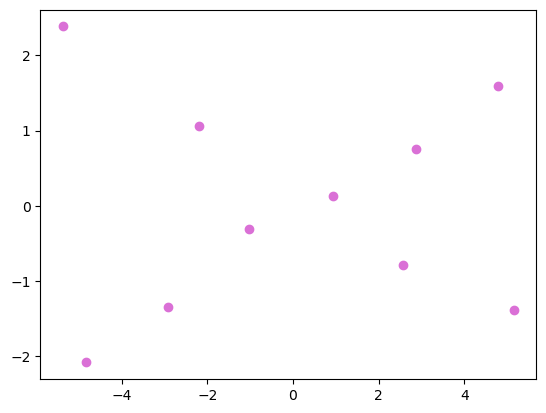

In [109]:
Y_reproj = np.transpose(evecs) @ Y
print(Y_reproj.shape)
plt.plot(Y_reproj[0,:],Y_reproj[1,:],'o',color = 'orchid')

#### Question 2.2
* For each principal component (row) of the new matrix plot the data as a time series for each block of assays (the first five columns and the second five columns).
* What can you say about the responses of cells to the two assays, heat shock and shift from glucose to glycerol?

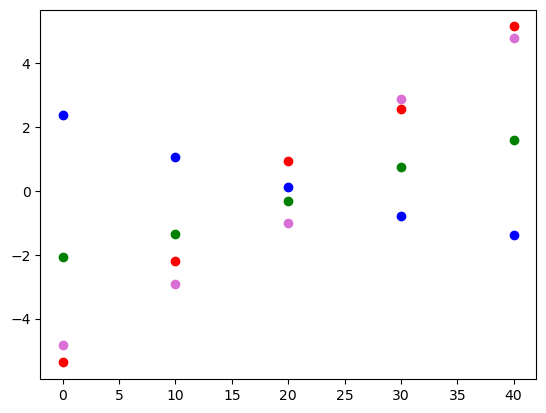

In [111]:
plt.plot(T[0,:5], Y_reproj[0,:5], 'o', color = 'orchid')
plt.plot(T[0,:5], Y_reproj[0,5:10], 'o', color = 'r')
plt.plot(T[0,:5], Y_reproj[1,:5], 'o', color = 'g')
plt.plot(T[0,:5], Y_reproj[1,5:10], 'o', color = 'b')

# We can say that the responses are generally similar in that all genes have increasing expression values except for—
# —when gene 2 had the shift from glucose to glycerol

#### Question 3: PCA on uncentered data
Let’s see the difference between finding the principal components of uncentered vs. centered data. Imagine you have the following data matrix X2.

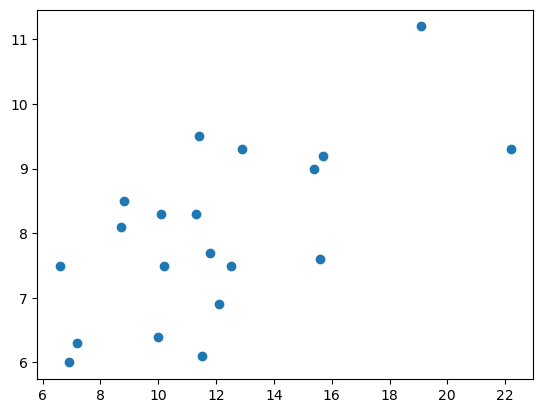

In [112]:
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])

plt.scatter(X2[0,:], X2[1,:])
plt.show()

Numpy's built-in covariance function mean-centers the data automatically. Another way of calculating the covariance matrix is multiply it with its own transpose and divide by the number of observations. I have implemented this function as `Cov_wo_meancentering(X)` below. It should give the same result as `np.cov` with the arguments `rowvar=False, bias=True` if centering is also implemented. 

In [113]:
def Cov_wo_meancentering(X):
    X = X.T
    lenX = X.shape[0]
    covariance = X.T.dot(X)/lenX
    return covariance

np.cov(X2)

array([[16.05578947,  3.46052632],
       [ 3.46052632,  1.79042105]])

* Without centering, i.e. mean subtracting, the data, find the covariance matrix of X2.
* Find the eigenvalues and eigenvectors of the covariance matrix. Reorder youreigenvectors and eigenvalues so that the eigenvector with the highest eigenvalue is in the first column.
* Transform the data X2 into the principal component space and plot each point, show your plot.
* Now redo the previous three steps, but subtract the mean of each dimension from all of the data points how is it different?

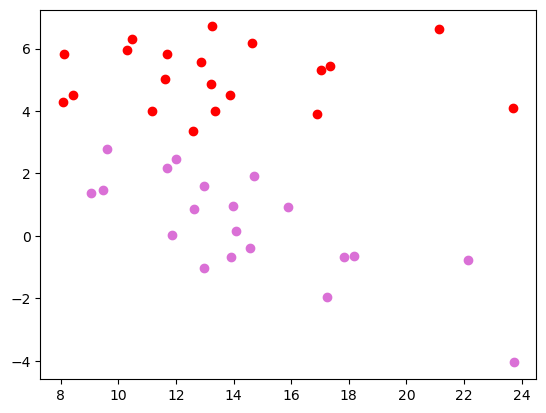

In [114]:
C2 = Cov_wo_meancentering(X2)
 
evals2, evecs2 = np.linalg.eig(C2)
order2 = evals2.argsort()[::-1]
evals2 = evals2[order2]
evecs2 = evecs2[:, order2]

X2_reproj = np.transpose(evecs2) @ X2
plt.plot(X2_reproj[0,:],X2_reproj[1,:],'o',color = 'orchid')

C3 = np.cov(X2)
evals3, evecs3 = np.linalg.eig(C3)
order3 = evals3.argsort()[::-1]
evals3 = evals3[order3]
evecs3 = evecs3[:, order3]
X3_reproj = np.transpose(evecs3) @ X2
plt.plot(X3_reproj[0,:],X3_reproj[1,:],'o',color = 'r')

# The measurement of variance is affected by the mean in the uncentered data plot, but mean is not a factor in the—
# —centered data plot

#### Question 4: PCA in High dimensions

Download and load the gene expression matrix X `X = np.load('geneExpressionMat_X.npy')`

X is a truncated gene expression matrix of the first 2000 genes across 8 days of sampling the fibroblast response to ectopic expression of transcription factors Oct4, Sox2, Klf4, c-Myc. These factors are called the Yamanaka Factors after [Shinya Yamanaka](https://en.wikipedia.org/wiki/Shinya_Yamanaka) who won a nobel prize for his discovery.  They enabled the creation of [induced pluripotent stem cells](https://en.wikipedia.org/wiki/Induced_pluripotent_stem_cell) which are dedifferentiated, somatic cells that are of enormous experimental value for their use in creating all cell types of the body. 

In this data set, the columns of X are replicates of the reprogramming process in the following order counted in days `[0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`.
 
* Mean center X by its genes (rows)
* Find the covariance matrix of X (This may take a minute to run and is a small taste of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* Sort the eigenvalues and eigenvectors and plot their real part with the Y axis being log scale `plt.semilogy(evals.real)`

* Reproject the data back onto to first two principal components and plot the experiments (originally the columns) on PC1 vs PC2.

* What type of variance does PC1 capture about the experiment? what about PC2?

Hint: Color each point by its day in the experiment.

`group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`
`plt.scatter(` some array`,` another array`, c=group, label=group,s=80)`

*See the **appendix** below for info on data munging*


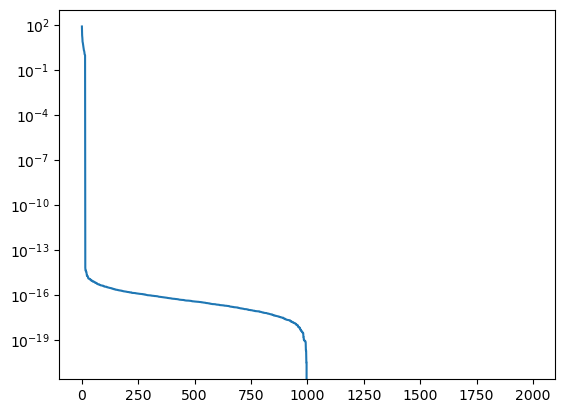

In [115]:
X = np.load('geneExpressionMat_X.npy')
    
np.mean(X, axis=1)

C = np.cov(X)

evals, evecs = np.linalg.eig(C)
order = evals.argsort()[::-1]
evals = evals[order]
evecs = evecs[:, order]
plt.semilogy(evals.real)

In [116]:

Y = X - np.mean(X, axis = 1).reshape(-1, 1)

C = np.cov(Y)

evals, evecs = np.linalg.eig(C)
order = evals.argsort()[::-1]
evals = evals[order]
evecs = evecs[:, order]

Y_reproj = np.transpose(evecs) @ Y

group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]


/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


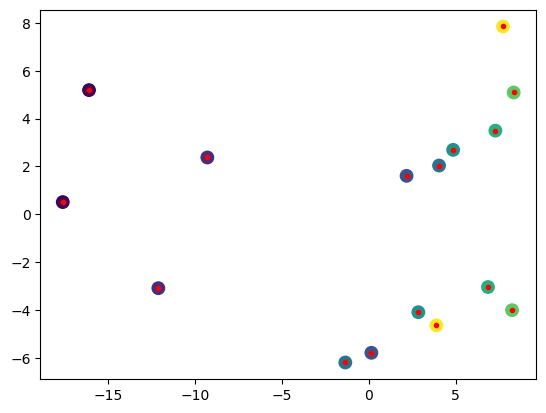

In [117]:
plt.scatter(Y_reproj[0,:],Y_reproj[1,:], c=group, label=group,s=80)
plt.plot(Y_reproj[0,:],Y_reproj[1,:],'.',color = 'r')


#PC1 shows variance of GSM943810
#PC2 shows variance of GSM943811

#### Question 5: SVD on Images
Read in the following the `Leopard_Spots.png` image into your python enviornment using the code provided below.

* Perform a singular value decomposition on this image to get U, D, and V-transpose. 

* Make a semilogy plot of the ranked singular values

* Reconstruct an approximation of the image using 1, 2, 4, 8, 16, and 32 of the singular values.

* Dot-indexing a numpy array using the .nbytes call will return the number of bytes required to store a numpy array. Calculate the number of bytes to store the the full U, D, and V-transpose matrices. How much memory can you save by using the first 32 singular values?




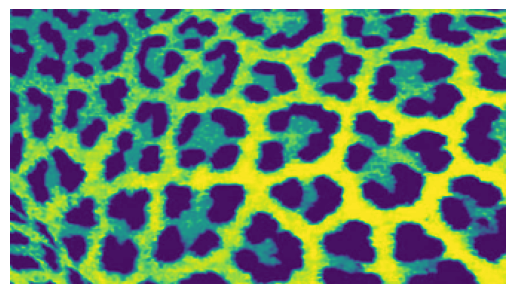

In [118]:
im = plt.imread('Leopard_Spots.png') #read image
im = np.mean(im,-1)#converts RGB image to grayscale
plt.axis('off')
plt.imshow(im)

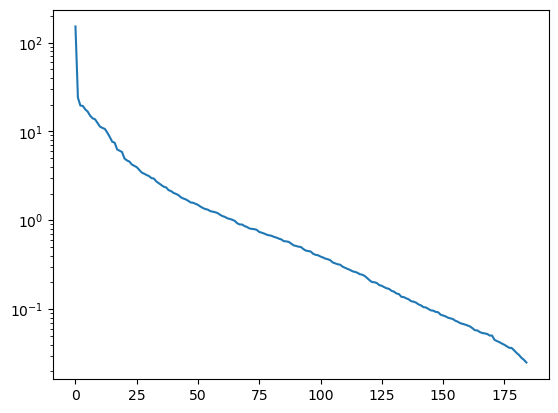

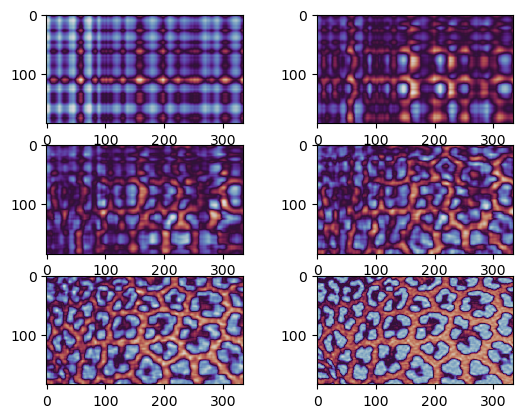

In [119]:
U, D, VT = np.linalg.svd(im, full_matrices = False)

plt.semilogy(D)
plt.show()

sin = [1, 2, 4, 8, 16, 32]
image = []
for n in sin:
    image2 = U[:,:n] @ np.diag(D[:n]) @ VT[:n,:]
    image.append(image2)

for i, image in enumerate(image):
    plt.subplot(3, 2, i+1)
    plt.imshow(image, cmap = 'twilight')

plt.show()

In [120]:
full = U.nbytes + D.nbytes + VT.nbytes
print('Full U, D, and VT matrices require', full, 'bytes of memory.')

first32 = U[:,:32].nbytes + D[:32].nbytes + VT[:32,:].nbytes

savings = full - first32
print('Using the first 32 singular values saves', savings, 'bytes of memory.')

Full U, D, and VT matrices require 384800 bytes of memory.
Using the first 32 singular values saves 318240 bytes of memory.


#### Question 6: Differentiating between normal and cancerous cells (extra credit, not optional for grads)

PCA is a very important technique for finding fundamental differences between normal and cancerous cells. 
Download and import the `ovariancancer_obs.csv` dataset which contains gene data for 216 patients, 121 of whom have ovarian cancer and 95 of whom do not. For each patient there is a vector of data containing the expression of 4000 genes. The `ovariancancer_grp.csv` file contains the labels for the observations matrix. 

Perform a PCA on the observation. Reproject the data on the first 3 principal components and plot them while labeling the points as cancerous or normal. What principal component captures the variance that differentiates cancer from normal tissue?



#### Appendix
Methods for downloading and munging gene expression datasets from the Gene Expression Omnibus 

Open a terminal and type `pip install GEOparse` to install the package onto your computer

Go to the [GEO database website](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser) and browse through the datasets to find a unique ID.

In [11]:
import GEOparse
import pandas as pd

# Downloading data set from the internet
gds = GEOparse.get_GEO(geo="GDS5316", destdir="./")
gds.metadata # see metadate

12-Feb-2023 16:05:10 DEBUG utils - Directory ./ already exists. Skipping.
12-Feb-2023 16:05:10 INFO GEOparse - File already exist: using local version.
12-Feb-2023 16:05:10 INFO GEOparse - Parsing ./GDS5316.soft.gz: 
12-Feb-2023 16:05:10 DEBUG GEOparse - DATABASE: Geo
12-Feb-2023 16:05:10 DEBUG GEOparse - DATASET: GDS5316
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_1
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_2
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_3
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_4
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_5
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_6
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_7
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_8
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_9
12-Feb-2023 16:05:10 DEBUG GEOparse - SUBSET: GDS5316_10
12-Feb-2023 16:05:10 DEBUG GEOparse - DATASET: GDS5316


{'title': ['Embryonic fibroblast response to ectopic expression of transcription factors Oct4, Sox2, Klf4, c-Myc: time course'],
 'description': ['Analysis of embryonic fibroblasts (MEFs) infected with retroviruses encoding four transcription factors (Oct4, Sox2, Klf4 and c-Myc) and sampled at day 1, 2, 3, 4, 5, 6 and 8. Results provide insight into molecular mechanisms underlying the reprogramming of MEFs into induced pluripotent stem cells.'],
 'type': ['Expression profiling by array'],
 'pubmed_id': ['24496101'],
 'platform': ['GPL6246'],
 'platform_organism': ['Mus musculus'],
 'platform_technology_type': ['in situ oligonucleotide'],
 'feature_count': ['35557'],
 'sample_organism': ['Mus musculus'],
 'sample_type': ['RNA'],
 'channel_count': ['1'],
 'sample_count': ['24'],
 'value_type': ['transformed count'],
 'reference_series': ['GSE38509'],
 'order': ['none'],
 'update_date': ['Feb 25 2015']}

In [81]:
#Explore the data
print(gds.columns) #See columns of the experiment
gds.table #See datatable

                                                 description  \
GSM943810  Value for GSM943810: GFP_Day1, biological rep1...   
GSM943811  Value for GSM943811: GFP_Day1, biological rep2...   
GSM943812  Value for GSM943812: GFP_Day3, biological rep1...   
GSM943813  Value for GSM943813: GFP_Day3, biological rep2...   
GSM943814  Value for GSM943814: GFP_Day5, biological rep1...   
GSM943815  Value for GSM943815: GFP_Day5, biological rep2...   
GSM943816  Value for GSM943816: GFP_Day8, biological rep1...   
GSM943817  Value for GSM943817: GFP_Day8, biological rep2...   
GSM943794  Value for GSM943794: 4F_Day0, biological rep1;...   
GSM943795  Value for GSM943795: 4F_Day0, biological rep2;...   
GSM943796  Value for GSM943796: 4F_Day1, biological rep1;...   
GSM943797  Value for GSM943797: 4F_Day1, biological rep2;...   
GSM943798  Value for GSM943798: 4F_Day2, biological rep1;...   
GSM943799  Value for GSM943799: 4F_Day2, biological rep2;...   
GSM943800  Value for GSM943800: 4F_Day3,

,ID_REF,IDENTIFIER,GSM943810,GSM943811,GSM943812,GSM943813,GSM943814,GSM943815,GSM943816,GSM943817,...,GSM943800,GSM943801,GSM943802,GSM943803,GSM943804,GSM943805,GSM943806,GSM943807,GSM943808,GSM943809
0,10344614,Gm2889,6.29617,6.45101,6.37991,6.26757,6.52466,6.05374,6.83572,6.21008,...,6.05109,6.23729,6.30669,6.17362,6.10562,6.20514,6.33344,6.09927,6.38911,6.49946
1,10344616,chr1:3102016-3102125,4.39913,4.32929,4.46461,4.37097,4.42780,4.38099,4.52419,4.34554,...,4.35500,4.37975,4.41392,4.32517,4.35227,4.32735,4.37240,4.34056,4.36301,4.33581
2,10344618,chr1:3276323-3277348,4.46034,4.38599,4.60766,4.40644,4.51869,4.40385,4.42031,4.38844,...,4.42315,4.38599,4.44134,4.38117,4.38191,4.37431,4.41430,4.41431,4.52342,4.38415
3,10344620,Gm10568,4.66660,4.60200,4.58188,4.60023,4.70038,4.74512,4.71090,4.69705,...,4.58007,4.64558,4.75212,4.62930,4.63973,4.68984,4.64699,4.60621,4.64830,4.54215
4,10344622,chr1:4771131-4772199,6.59419,6.66879,6.67166,6.66234,6.65136,6.73410,6.66391,6.47003,...,7.21701,6.90418,7.14693,7.20632,7.11902,7.12320,6.98481,7.25165,6.67337,7.34235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35552,10344609,control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35553,10344610,control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35554,10344611,control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35555,10344612,control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Subset the data on the columns that you are interested in analyzing
cols = ['GSM943794','GSM943796','GSM943798','GSM943800','GSM943802','GSM943804','GSM943806','GSM943808',]
data = gds.table[cols]

#Remove rows with NaN - missing values
data = data.dropna()

#Convert to a numpy array for further analysis
X = data.to_numpy()